In [7]:
import pandas as pd
import numpy as np
import pylab as plt
import time
from datetime import datetime
import geopandas as gpd
from geopandas import GeoDataFrame
from sklearn.cluster import DBSCAN
from shapely.geometry import Point
% pylab inline

Populating the interactive namespace from numpy and matplotlib


D:\ana\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [10]:
# reading in Community District shapefile for plotting
CD = gpd.GeoDataFrame.from_file('geo_export_ee9543f0-d85f-4190-9942-01cf5a860484.shp')
CD.head()

,shape_leng,shape_area,boro_cd,geometry
0,51549.557886,1.031778e+08,311.0,POLYGON ((-73.97299433938896 40.60881414180224...
1,65821.999543,8.819584e+07,313.0,POLYGON ((-73.98372152615247 40.59582107821707...
2,52245.830489,9.952550e+07,312.0,POLYGON ((-73.97139631688152 40.64825778611409...
3,37008.100320,5.666322e+07,304.0,POLYGON ((-73.89646625062909 40.68233642247531...
4,62239.832144,1.142663e+08,209.0,"POLYGON ((-73.83979488496 40.8356192074919, -7..."


In [12]:
# change boro_cd type for merging 
CD['boro_cd'] = CD['boro_cd'].astype('int')
CD.head()

,shape_leng,shape_area,boro_cd,geometry
0,51549.557886,1.031778e+08,311,POLYGON ((-73.97299433938896 40.60881414180224...
1,65821.999543,8.819584e+07,313,POLYGON ((-73.98372152615247 40.59582107821707...
2,52245.830489,9.952550e+07,312,POLYGON ((-73.97139631688152 40.64825778611409...
3,37008.100320,5.666322e+07,304,POLYGON ((-73.89646625062909 40.68233642247531...
4,62239.832144,1.142663e+08,209,"POLYGON ((-73.83979488496 40.8356192074919, -7..."


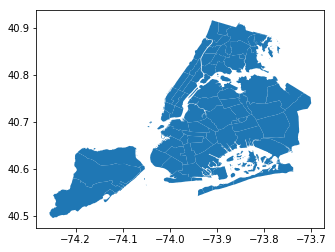

In [13]:
CD.geometry.plot()

In [2]:
# reading in community districts in Brooklyn 
bk = pd.read_csv("brooklyn_AD.csv")
bk.head()

,Unnamed: 0,FID,Join_Count,TARGET_FID,Field1,index,CMPLNT_NUM,CMPLNT_FR_,CMPLNT_FR1,OFNS_DESC,...,Y_COORD_CD,Latitude,Longitude,Lat_Lon,hour,weekday,datetime,BoroCD,Shape_Leng,Shape_Area
0,0,0,1,0,0,313,846207268,2017/12/31 0:00,2000/12/30 0:00,ASSAULT 3 & RELATED OFFENSES,...,176742,40.651800,-74.012345,"(40.651800177, -74.01234462)",12,SUNDAY,2017/12/31 0:00,307,87424.46794,104141853.2
1,7,7,1,7,7,1176,820434396,2017/12/30 0:00,NaN,CRIMINAL MISCHIEF & RELATED OF,...,181040,40.663598,-73.991091,"(40.663597564, -73.991091158)",14,SATURDAY,2017/12/30 0:00,307,87424.46794,104141853.2
2,8,8,1,8,8,1179,202322831,2017/12/30 0:00,NaN,CRIMINAL MISCHIEF & RELATED OF,...,180110,40.661045,-73.997432,"(40.661045235, -73.997431545)",13,SATURDAY,2017/12/30 0:00,307,87424.46794,104141853.2
3,19,19,1,19,19,1217,368015844,2017/12/30 0:00,2000/12/30 0:00,CRIMINAL MISCHIEF & RELATED OF,...,176676,40.651617,-73.975344,"(40.651617042, -73.975343987)",12,SATURDAY,2017/12/30 0:00,307,87424.46794,104141853.2
4,24,24,1,24,24,1229,291921168,2017/12/30 0:00,2000/12/10 0:00,ASSAULT 3 & RELATED OFFENSES,...,167196,40.625587,-73.946649,"(40.625586727, -73.946649424)",12,SATURDAY,2017/12/30 0:00,318,190125.36520,235716484.8


In [3]:
bkcood = bk[['X_COORD_CD', 'Y_COORD_CD']]
bkcood.head()

,X_COORD_CD,Y_COORD_CD
0,980825,176742
1,986722,181040
2,984963,180110
3,991092,176676
4,999060,167196


In [4]:
rawBK = bkcood.values
rawBK

array([[980825, 176742],
       [986722, 181040],
       [984963, 180110],
       ..., 
       [984692, 167176],
       [976254, 165780],
       [983567, 157858]], dtype=int64)

eps = 44.236 , min_samples = 200 , num_detected_points = 471


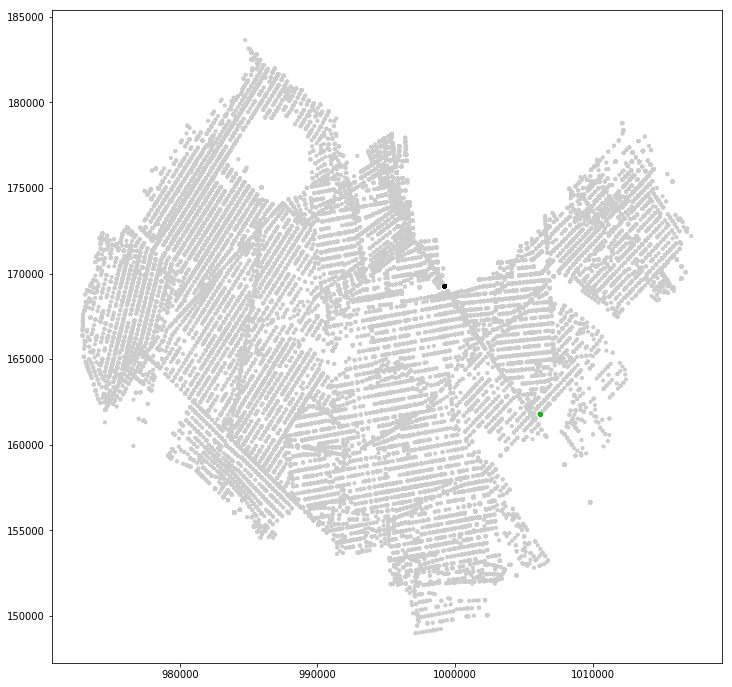

eps = 95.3035729483 , min_samples = 200 , num_detected_points = 471


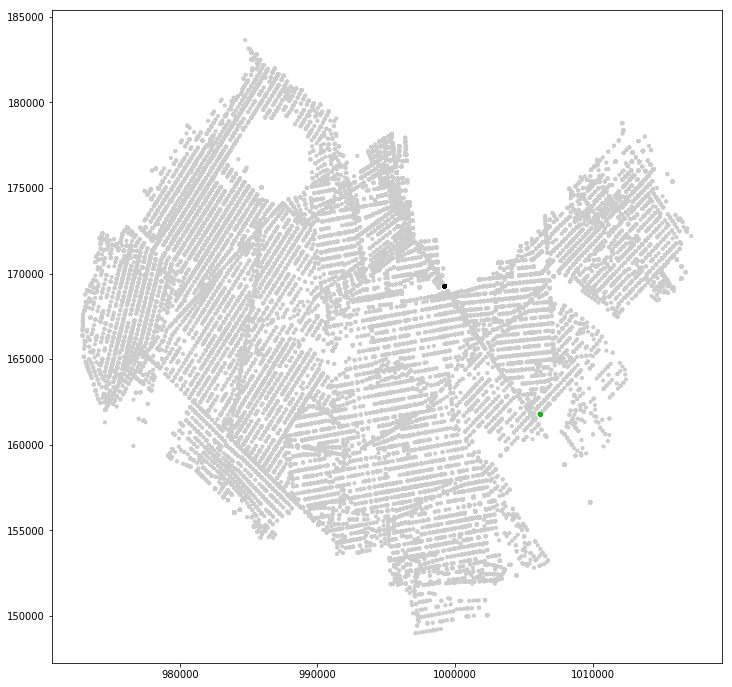

eps = 205.325323644 , min_samples = 200 , num_detected_points = 476


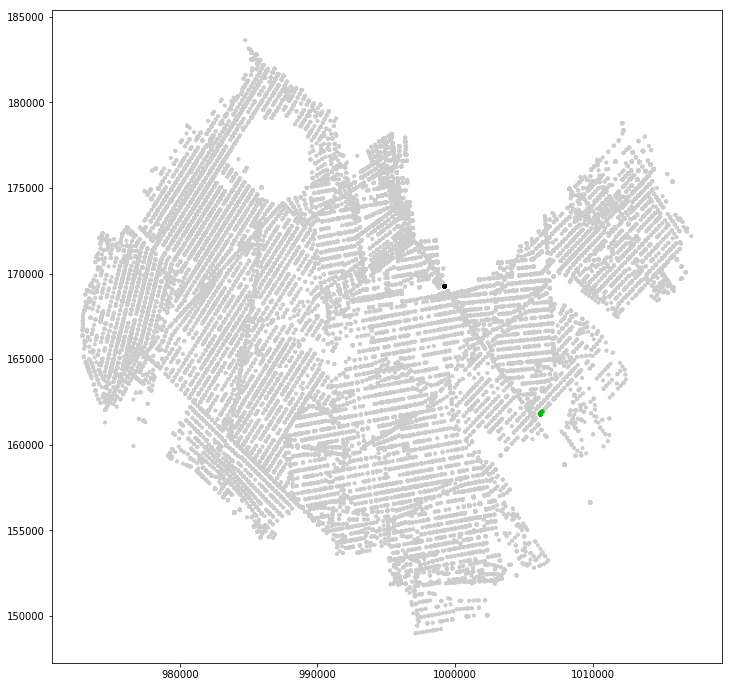

eps = 442.36 , min_samples = 200 , num_detected_points = 3626


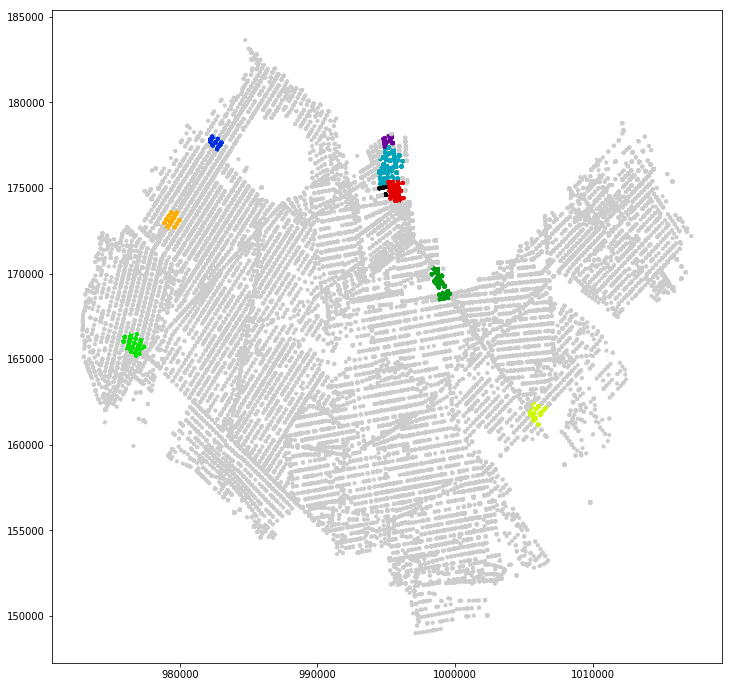


KeyboardInterrupt



In [5]:
# loop through the logspace of max_eps to find the optimal epsilon value
total_num_samples = len(rawBK[:,0])
min_samples = 200
max_eps = max(np.max(rawBK[:,0])-np.min(rawBK[:,0]),np.max(rawBK[:,1])-np.min(rawBK[:,1]))

for eps in np.logspace(np.log10(max_eps)-3,np.log10(max_eps),10):
    db = DBSCAN(eps, min_samples).fit(rawBK)
    num_clustered = len(db.labels_[db.labels_ >= 0])
    if (num_clustered > 0) & (num_clustered < 0.1*total_num_samples):
        print "eps =", eps, ", min_samples =", min_samples, ", num_detected_points =", len(db.labels_[db.labels_ >= 0])
        plt.figure(figsize=(12,12))
        plt.scatter(rawBK[:,0],rawBK[:,1],c=db.labels_,s=10,cmap=plt.cm.spectral_r)
        plt.show()

eps = 442.36 , min_samples = 200 , num_detected_points = 3626


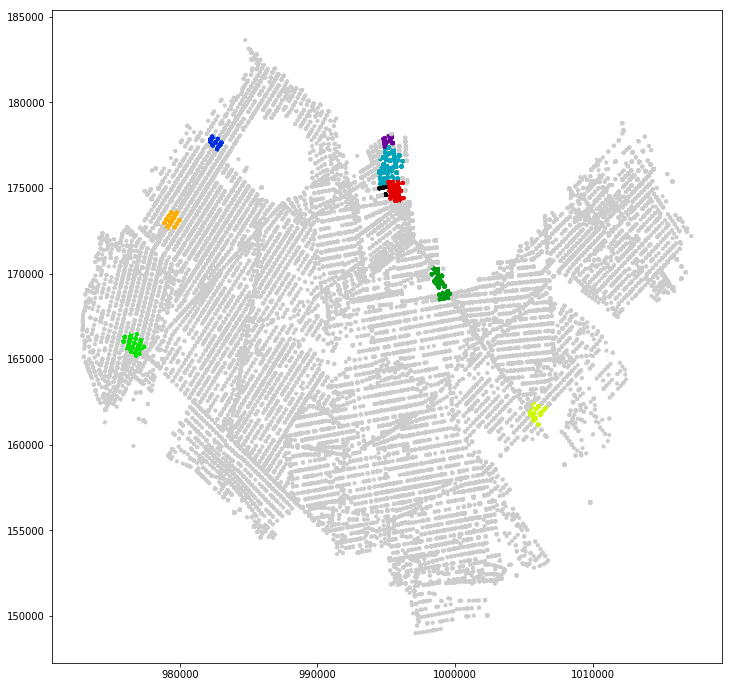

In [6]:
# re-plotting the best combination of parameters
total_num_samples = len(rawBK[:,0])
eps = 442.36
min_samples = 200
db = DBSCAN(eps, min_samples).fit(rawBK)
num_clustered = len(db.labels_[db.labels_ >= 0])
if (num_clustered > 0) & (num_clustered < 0.1*total_num_samples):
    print "eps =", eps, ", min_samples =", min_samples, ", num_detected_points =", len(db.labels_[db.labels_ >= 0])
    plt.figure(figsize=(12,12))
    plt.scatter(rawBK[:,0],rawBK[:,1],alpha=1,c=db.labels_,s=10,cmap=plt.cm.spectral_r)
    plt.show()

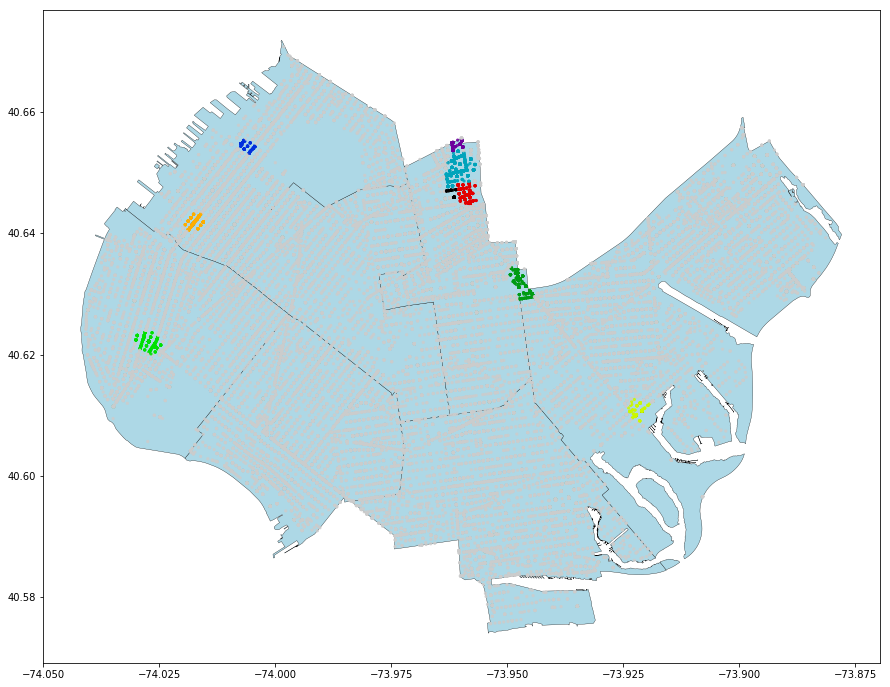

In [14]:
fig = plt.figure(figsize=[15,12])
ax = fig.add_subplot(111)
bkcd = CD[CD.boro_cd.isin(bk.BoroCD)]
bkcd.geometry.plot(color = "lightblue", edgecolor = "black", linewidth = 0.3, ax = ax)
plt.scatter(bk['Longitude'], bk['Latitude'], alpha = 0.8, c=db.labels_,s=5,cmap=plt.cm.spectral_r)

In [15]:
# exporting the complaint data points as shapefile for visualization on Carto
bk['clabel'] = db.labels_
bk2 = bk[['CMPLNT_FR_','Latitude', 'Longitude', 'clabel']]
geometry = [Point(xy) for xy in zip(bk2.Longitude, bk2.Latitude)]
bk2 = bk2.drop(['Longitude', 'Latitude'], axis=1)
crs = {'init': 'epsg:4326'}
bkgdf = GeoDataFrame(bk2, crs=crs, geometry=geometry)
bkgdf.to_file("bk")

In [16]:
# reading in Manhattan Community Districts after clustering
mn = pd.read_csv("man_AD.csv")
mnc = mn[['X_COORD_CD', 'Y_COORD_CD']]
rawMN = mnc.values

eps = 59.907 , min_samples = 200 , num_detected_points = 1107


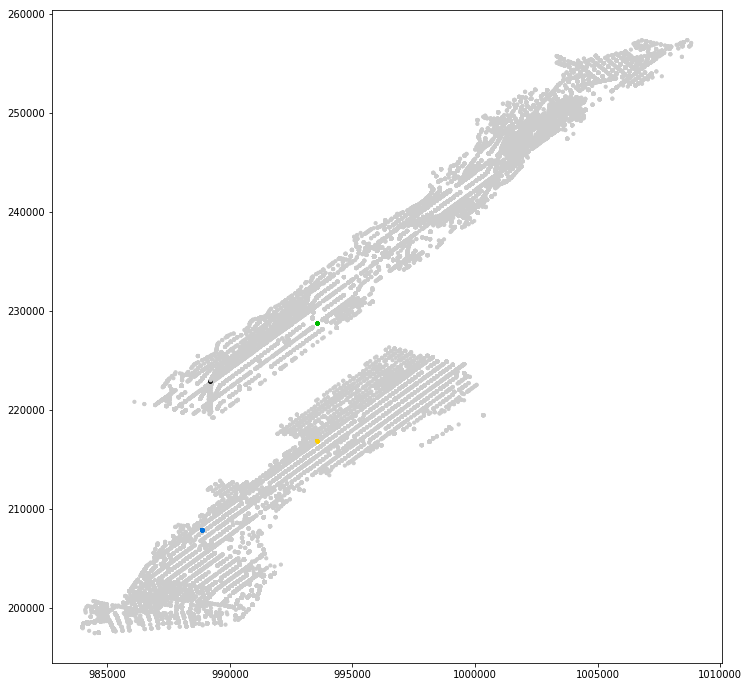

eps = 129.065718976 , min_samples = 200 , num_detected_points = 1169


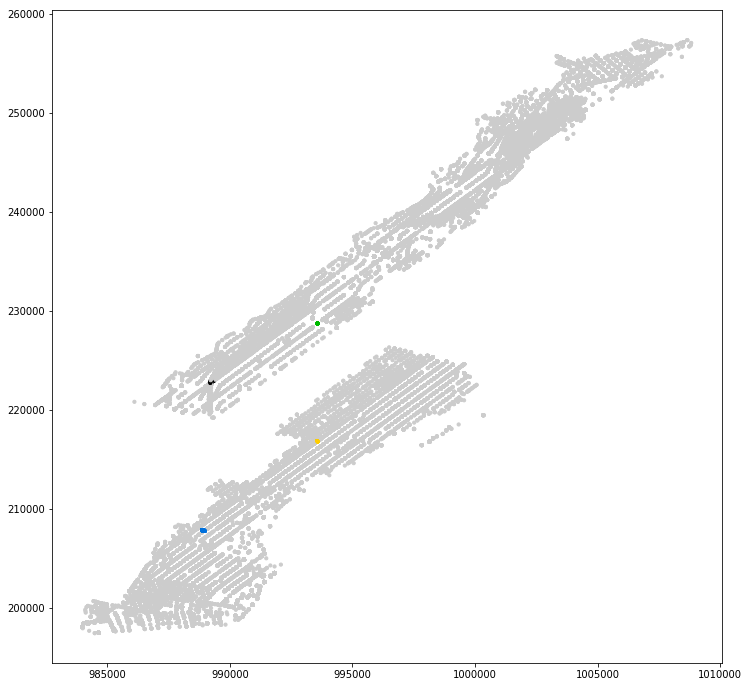

Exception KeyboardInterrupt in 'zmq.backend.cython.message.Frame.__dealloc__' ignored


KeyboardInterrupt: 

In [17]:
total_num_samples = len(rawMN[:,0])
min_samples = 200
max_eps = max(np.max(rawMN[:,0])-np.min(rawMN[:,0]),np.max(rawMN[:,1])-np.min(rawMN[:,1]))

for eps in np.logspace(np.log10(max_eps)-3,np.log10(max_eps),10):
    db = DBSCAN(eps, min_samples).fit(rawMN)
    num_clustered = len(db.labels_[db.labels_ >= 0])
    if (num_clustered > 0) & (num_clustered < 0.1*total_num_samples):
        print "eps =", eps, ", min_samples =", min_samples, ", num_detected_points =", len(db.labels_[db.labels_ >= 0])
        plt.figure(figsize=(12,12))
        plt.scatter(rawMN[:,0],rawMN[:,1],c=db.labels_,s=10,cmap=plt.cm.spectral_r)
        plt.show()

The result above shows that there is no valid spatial clustering of high density of crime complaints.

In [18]:
# reading in the complaint data by community districts in Queens after clustering
QS = pd.read_csv("queens_AD.csv")
QSC = QS[['X_COORD_CD', 'Y_COORD_CD']]
rawQS = QSC.values

In [21]:
max_eps = max(np.max(rawQS[:,0])-np.min(rawQS[:,0]),np.max(rawQS[:,1])-np.min(rawQS[:,1]))

np.logspace(np.log10(max_eps)-3,np.log10(max_eps), 10)

array([    44.046     ,     94.89423036,    204.44342177,    440.46      ,
          948.94230357,   2044.43421765,   4404.6       ,   9489.42303571,
        20444.34217653,  44046.        ])

eps = 44.046 , min_samples = 200 , num_detected_points = 1530


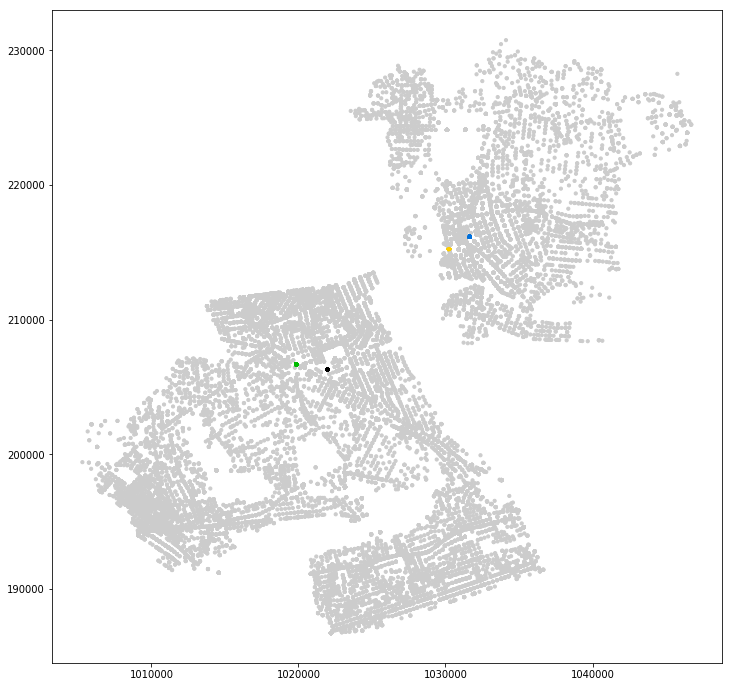

eps = 94.8942303571 , min_samples = 200 , num_detected_points = 1536


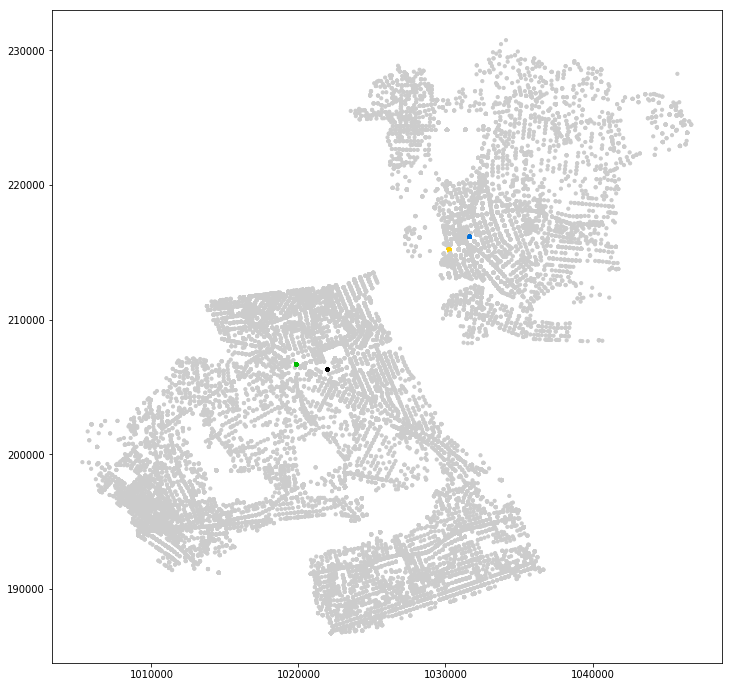

eps = 204.443421765 , min_samples = 200 , num_detected_points = 1786


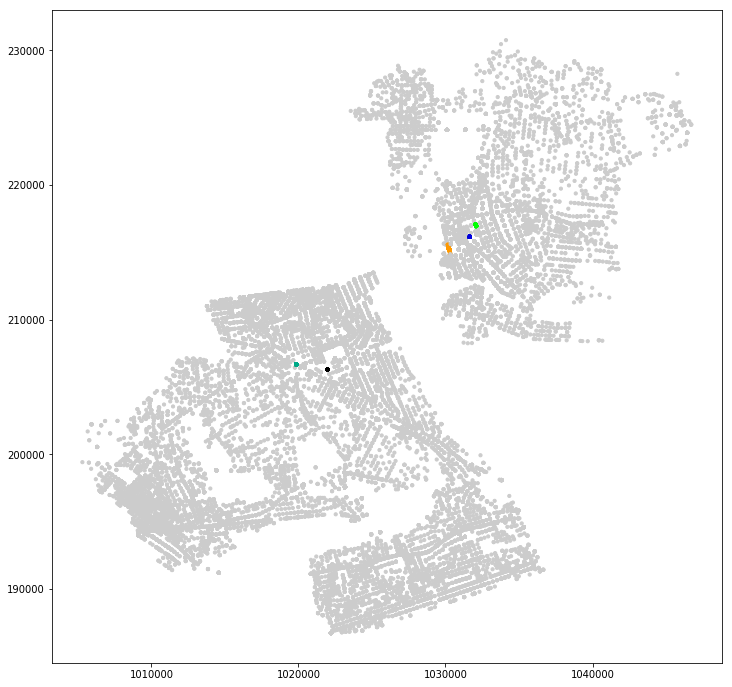

Exception KeyboardInterrupt in 'zmq.backend.cython.message.Frame.__dealloc__' ignored


KeyboardInterrupt: 

In [19]:
total_num_samples = len(rawQS[:,0])
min_samples = 200
max_eps = max(np.max(rawQS[:,0])-np.min(rawQS[:,0]),np.max(rawQS[:,1])-np.min(rawQS[:,1]))

for eps in np.logspace(np.log10(max_eps)-3,np.log10(max_eps),10):
    db = DBSCAN(eps, min_samples).fit(rawQS)
    num_clustered = len(db.labels_[db.labels_ >= 0])
    if (num_clustered > 0) & (num_clustered < 0.1*total_num_samples):
        print "eps =", eps, ", min_samples =", min_samples, ", num_detected_points =", len(db.labels_[db.labels_ >= 0])
        plt.figure(figsize=(12,12))
        plt.scatter(rawQS[:,0],rawQS[:,1],c=db.labels_,s=10,cmap=plt.cm.spectral_r)
        plt.show()

eps = 400.46 , min_samples = 200 , num_detected_points = 2547


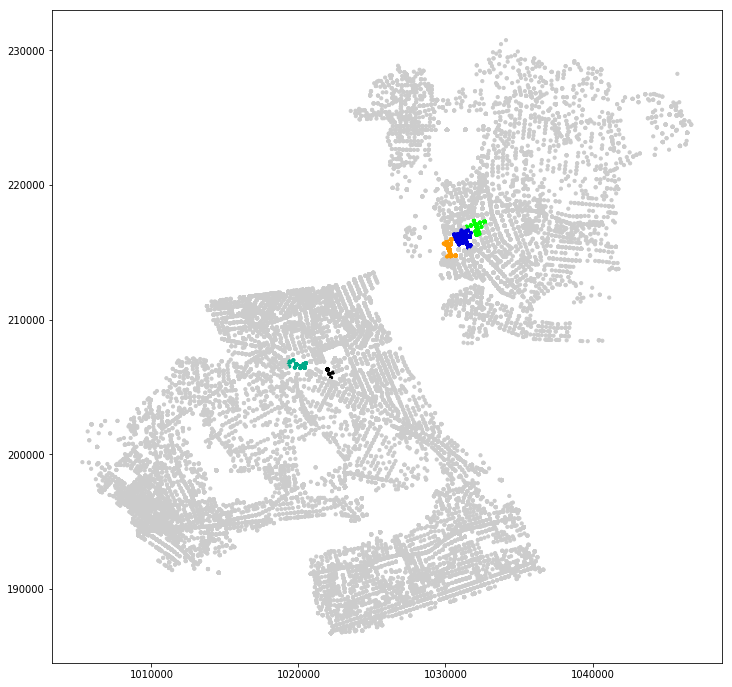

In [27]:
total_num_samples = len(rawQS[:,0])
eps = 400.46 
min_samples = 200
db = DBSCAN(eps, min_samples).fit(rawQS)
num_clustered = len(db.labels_[db.labels_ >= 0])
if (num_clustered > 0) & (num_clustered < 0.1*total_num_samples):
    print "eps =", eps, ", min_samples =", min_samples, ", num_detected_points =", len(db.labels_[db.labels_ >= 0])
    plt.figure(figsize=(12,12))
    plt.scatter(rawQS[:,0],rawQS[:,1],c=db.labels_,s=10,cmap=plt.cm.spectral_r)
    plt.show()

In [28]:
# exporting the complaint data points as shapefile for visualization on Carto
QS['clabel'] = db.labels_
QS2 = QS[['CMPLNT_FR_','Latitude', 'Longitude', 'clabel']]
geometry = [Point(xy) for xy in zip(QS2.Longitude, QS2.Latitude)]
QS2 = QS2.drop(['Longitude', 'Latitude'], axis=1)
crs = {'init': 'epsg:4326'}
qsgdf = GeoDataFrame(QS2, crs=crs, geometry=geometry)
qsgdf.to_file("qs")